# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [26]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [27]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]


data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

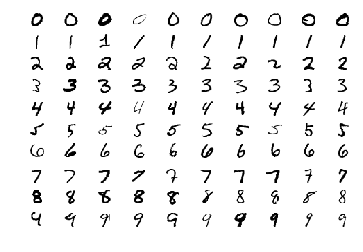

In [3]:
#def P1(num_examples=10):

### STUDENT START ###

##img = np.reshape(num,(28,28))
##plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
##plt.title('Training: %i' % label)
tempLabels = test_labels
tempData = test_data

for i in range(10):
    for j in range(10):
        index = tempLabels.tolist().index(float(i))
        img = np.reshape(tempData[index],(28,28))
        plt.subplot(10,10,i*10+j+1)
        plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.axis('off')
        tempLabels = tempLabels.tolist()
        del tempLabels[index]
        tempLabels = np.asarray(tempLabels)
        tempData = tempData.tolist()
        del tempData[index]
        tempData = np.asarray(tempData)


    
### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [95]:
#def P2(k_values):

### STUDENT START ###
#instantiate learning model (k=1)
knn = KNeighborsClassifier(n_neighbors=1)

#fitting the model
knn.fit(mini_train_data, mini_train_labels)

# predict the response
pred = knn.predict(dev_data)

# evaluate accuracy
print 'FOR K = 1'
print classification_report(dev_labels, pred)

#instantiate learning model (k=3)
knn = KNeighborsClassifier(n_neighbors=3)

#fitting the model
knn.fit(mini_train_data, mini_train_labels)

# predict the response
pred = knn.predict(dev_data)

# evaluate accuracy
print 'FOR K = 3'
print classification_report(dev_labels, pred)

#instantiate learning model (k=5)
knn = KNeighborsClassifier(n_neighbors=5)

#fitting the model
knn.fit(mini_train_data, mini_train_labels)

# predict the response
pred = knn.predict(dev_data)

# evaluate accuracy
print 'FOR K = 5'
print classification_report(dev_labels, pred)

#instantiate learning model (k=7)
knn = KNeighborsClassifier(n_neighbors=7)

#fitting the model
knn.fit(mini_train_data, mini_train_labels)

# predict the response
pred = knn.predict(dev_data)

# evaluate accuracy
print 'FOR K = 7'
print classification_report(dev_labels, pred)

#instantiate learning model (k=9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(mini_train_data, mini_train_labels)

# predict the response
pred = knn.predict(dev_data)

# evaluate accuracy
print 'FOR K = 9'
print classification_report(dev_labels, pred)

### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

             precision    recall  f1-score   support

        0.0       0.87      0.96      0.91        99
        1.0       0.82      0.97      0.89       105
        2.0       0.94      0.80      0.87       102
        3.0       0.69      0.71      0.70        86
        4.0       0.89      0.74      0.81       104
        5.0       0.87      0.74      0.80        91
        6.0       0.87      0.92      0.89        98
        7.0       0.78      0.77      0.78       113
        8.0       0.74      0.60      0.67        96
        9.0       0.67      0.86      0.76       106

avg / total       0.82      0.81      0.81      1000

             precision    recall  f1-score   support

        0.0       0.83      0.97      0.89        99
        1.0       0.76      0.96      0.85       105
        2.0       0.93      0.80      0.86       102
        3.0       0.70      0.77      0.73        86
        4.0       0.84      0.77      0.80       104
        5.0       0.93      0.73      0.81

ANSWER: Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

For k=1, the precision is 0.82, the recall is 0.97 and the f1-score 0.89. Examining all three scores for each number yields very low numbers for 9, 8, and 3. 9 has the lowest precision score, but 8 has a very low recall score which brings it's f-1 score slightly below 9. Although this is true, I would still argue that 9 is the most confused digit since its precision was so much lower than 8's. 

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [11]:
#def P3(train_sizes, accuracies):

### STUDENT START ###
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []

for x in range(9):
    data = train_data[:train_sizes[x]]
    labels = train_labels[:train_sizes[x]]
    
    #instantiate learning model (k=1)
    knn = KNeighborsClassifier(n_neighbors=1)
    
    # fitting the model
    knn.fit(data, labels)
    
    time1 = time.time()
    # predict the response
    pred = knn.predict(dev_data)
    time2 = time.time()
    accuracies.append(accuracy_score(test_labels, pred))
    
    elapsed = time2 - time1
    
    # evaluate accuracy
    print "Accuracy for size: ", train_sizes[x]
    print accuracy_score(test_labels, pred)
    print "Time elapsed: ", elapsed
    print ""

### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)

Accuracy for size:  100
0.132666666667
Time elapsed:  1.02800011635

Accuracy for size:  200
0.139111111111
Time elapsed:  2.03399991989

Accuracy for size:  400
0.142888888889
Time elapsed:  4.01600003242

Accuracy for size:  800
0.159222222222
Time elapsed:  8.32899999619

Accuracy for size:  1600
0.182
Time elapsed:  17.3899998665

Accuracy for size:  3200
0.213
Time elapsed:  35.1819999218

Accuracy for size:  6400
0.241666666667
Time elapsed:  70.4530000687

Accuracy for size:  12800
0.262111111111
Time elapsed:  140.250999928

Accuracy for size:  25000
0.267888888889
Time elapsed:  275.082999945



(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

 y = 5.41143160698e-06 * x + 0.163030917711


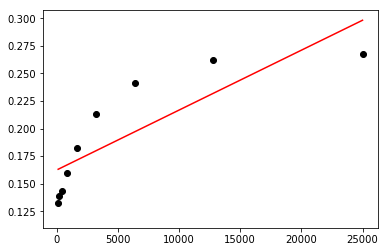

 y = 0.0644433723791 * x + -0.0130154839122


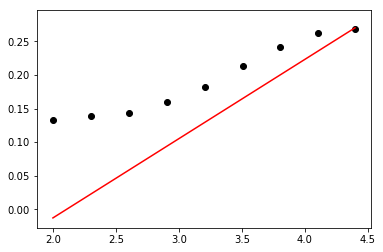

 y = 3.37366811375e-05 * x + -1.65036060584


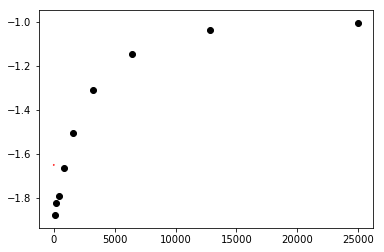

In [25]:
#def P4():

### STUDENT START ###

def logit(p):
    return np.log(p) - np.log(1 - p)

regr = LinearRegression()
train_sizes2 = np.reshape(train_sizes, (-1,1))

regr.fit(train_sizes2, accuracies)
m = regr.coef_[0]
b = regr.intercept_
max_x = max(train_sizes2)
min_x = min(train_sizes2)
print(' y = {0} * x + {1}'.format(m, b))

# Plot outputs
plt.scatter(train_sizes2, accuracies,  color='black')
plt.plot([min_x, max_x], [b, m*max_x + b], 'r')

plt.show()

regr.fit(np.log10(train_sizes2), accuracies)
m2 = regr.coef_[0]
b2 = regr.intercept_
max_x2 = np.log10(max(train_sizes2))
min_x2 = np.log10(min(train_sizes2))
print(' y = {0} * x + {1}'.format(m2, b2))

# Plot outputs
plt.scatter(np.log10(train_sizes2), accuracies,  color='black')
plt.plot([min_x2, max_x2], [b2, m2*max_x2 + b2], 'r')

plt.show()

accuracies2 = []
for i in range(len(accuracies)):
    accuracies2.append(logit(accuracies[i]))
    
regr.fit(train_sizes2, accuracies2)
m2 = regr.coef_[0]
b2 = regr.intercept_
max_x2 = np.log10(max(train_sizes2))
min_x2 = np.log10(min(train_sizes2))
print(' y = {0} * x + {1}'.format(m2, b2))

# Plot outputs
plt.scatter(train_sizes2, accuracies2,  color='black')
plt.plot([min_x2, max_x2], [b2, m2*max_x2 + b2], 'r')

plt.show()

### STUDENT END ###

#P4()

ANSWER: Our first linear regression model isn't very good--the scatter plot looks very very logarithmic and the line does not fit well as a result. In the second example, a log transform was applied. It looks slightly better than the first example, but still not very good. In the third example, a logit transform was applied to accuracies, but still didn't yield a very good result. 

In conclusion, I don't think that this data lends itself very well to linear regression because the shape of the data is very nonlinear, even after transforming different ways.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

done fitting
done predicting


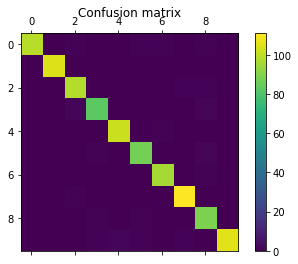

predicted bad labels :  0.0
predicted bad labels :  0.0
predicted bad labels :  0.0
predicted bad labels :  0.0


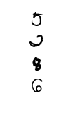

In [7]:
#def P5():

### STUDENT START ###

#instantiate learning model (k=1)
knn = KNeighborsClassifier(n_neighbors=1)

#fitting the model
knn.fit(train_data, train_labels)

print "done fitting"

pred = knn.predict(dev_data)

print "done predicting"

cm = confusion_matrix(pred, dev_labels)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
plt.show()

badones = []
badlabels = []
count = 0

for i in range(len(pred)):
    if count == 4:
        break
    if pred[i] == 0 or pred[i] == 1:
        if dev_labels[i] != pred[i]:
            badones.append(dev_data[i])
            badlabels.append(pred[i])
            count = count+1
            
for i in range(len(badones)):
    img = np.reshape(badones[i],(28,28))
    plt.subplot(10,10,i*10+1+1)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    print 'predicted bad labels : ', badlabels[i]
    
### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [12]:
#def P6():
    
### STUDENT START ###

blurLabels = mini_train_labels
blurData = mini_train_data

# Size of grid
X = 27
Y = 27

neighbors = lambda x, y : [(x2, y2) for x2 in range(x-1, x+2)
                               for y2 in range(y-1, y+2)
                               if (-1 < x <= X and
                                   -1 < y <= Y and
                                   (x != x2 or y != y2) and
                                   (0 <= x2 <= X) and
                                   (0 <= y2 <= Y))]

#no blur
#training data, not dev data
knn = KNeighborsClassifier(n_neighbors=1)
    
# fitting the model
knn.fit(mini_train_data, mini_train_labels)

time1 = time.time()
# predict the response
pred = knn.predict(dev_data)
time2 = time.time()
accuracies.append(accuracy_score(dev_labels, pred))

# evaluate accuracy
print "Accuracy for no preprocessing: "
print accuracy_score(dev_labels, pred)
print "Time elapsed: ", elapsed
print ""

#for all numbers in training set
for i in range(len(blurData)):
    #img = np.reshape(blurData[i],(28,28))
    #print('before blur')
    #f = plt.figure(1)
    #plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    #f.show()
    for x in range(28):
        #get list of neighbors
        for y in range(28):
            arr = neighbors(x,y)
            pixsum = blurData[i][(x*28)+y]
            pixavg = 0
            #get value for each element in list
            for n in range(len(arr)):
                tup = arr[n]
                a = tup[0]
                b = tup[1]
                val = blurData[i][(a*28)+b]
                pixsum += val
            
            pixavg = pixsum/(len(arr)+1)
            blurData[i][(x*28)+y] = pixavg
        
    #img2 = np.reshape(blurData[i],(28,28))
    #print('after blur')
    #g = plt.figure(2)
    #plt.imshow(img2, cmap=plt.cm.gray_r, interpolation='nearest')
    #g.show()
        

#training data, not dev data
knn = KNeighborsClassifier(n_neighbors=1)
    
# fitting the model
knn.fit(blurData, blurLabels)

time1 = time.time()
# predict the response
pred = knn.predict(dev_data)
time2 = time.time()
accuracies.append(accuracy_score(dev_labels, pred))

# evaluate accuracy
print "Accuracy for preprocess the training data but not the dev data: "
print accuracy_score(dev_labels, pred)
print "Time elapsed: ", elapsed
print ""

blurDataDev = dev_data
blurLabelsDev = dev_labels

#for all numbers in dev set
for i in range(len(blurDataDev)):
    #img = np.reshape(blurData[i],(28,28))
    #print('before blur')
    #f = plt.figure(1)
    #plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    #f.show()
    for x in range(28):
        #get list of neighbors
        for y in range(28):
            arr = neighbors(x,y)
            pixsum = blurDataDev[i][(x*28)+y]
            pixavg = 0
            #get value for each element in list
            for n in range(len(arr)):
                tup = arr[n]
                a = tup[0]
                b = tup[1]
                val = blurDataDev[i][(a*28)+b]
                pixsum += val
            
            pixavg = pixsum/(len(arr)+1)
            blurDataDev[i][(x*28)+y] = pixavg
        
    #img2 = np.reshape(blurData[i],(28,28))
    #print('after blur')
    #g = plt.figure(2)
    #plt.imshow(img2, cmap=plt.cm.gray_r, interpolation='nearest')
    #g.show()
        

#dev data, not training data
knn = KNeighborsClassifier(n_neighbors=1)
    
# fitting the model
knn.fit(mini_train_data, mini_train_labels)

time1 = time.time()
# predict the response
pred = knn.predict(blurDataDev)
time2 = time.time()
accuracies.append(accuracy_score(blurLabelsDev, pred))

# evaluate accuracy
print "Accuracy for preprocess the dev data but not the training data: "
print accuracy_score(blurLabelsDev, pred)
print "Time elapsed: ", elapsed
print ""
        

#both
knn = KNeighborsClassifier(n_neighbors=1)
    
# fitting the model
knn.fit(blurData, blurLabels)

time1 = time.time()
# predict the response
pred = knn.predict(blurDataDev)
time2 = time.time()
accuracies.append(accuracy_score(blurLabelsDev, pred))

# evaluate accuracy
print "Accuracy for preprocess the training data and the dev data: "
print accuracy_score(blurLabelsDev, pred)
print "Time elapsed: ", elapsed
print ""

### STUDENT END ###

#P6()

Accuracy for no preprocessing: 
0.784
Time elapsed:  296.155999899

Accuracy for preprocess the training data but not the dev data: 
0.778
Time elapsed:  296.155999899

Accuracy for preprocess the dev data but not the training data: 
0.756
Time elapsed:  296.155999899

Accuracy for preprocess the training data and the dev data: 
0.756
Time elapsed:  296.155999899



ANSWER: The accuracy doesn't change very much from case to case with the blur filter I implemented, but this isn't necessarily expected because my blur filter was not very complex. The accuracy ranks from greatest to least in the order that it's executed: no preprocessing, processing training data, processing dev data, and processing both. 

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [9]:
#def P7():

### STUDENT START ###
tempTrain = train_data

for i in range(len(tempTrain)):
    for j in range(len(tempTrain[i])):
        if(tempTrain[i][j] > 0):
            tempTrain[i][j] = 1
        

gnb = GaussianNB()
y_pred = gnb.fit(tempTrain, train_labels).predict(test_data)
print("Number of mislabeled points out of a total %d points : %d" % (test_data.shape[0],(test_labels != y_pred).sum()))


for i in range(len(tempTrain)):
    for j in range(len(tempTrain[i])):
        if(tempTrain[i][j] <= 0.3):
            tempTrain[i][j] = 0
        elif(tempTrain[i][j] <= 0.6):
            tempTrain[i][j] = 1
        else:
            tempTrain[i][j] = 2
        

mnb = MultinomialNB()
y_pred = mnb.fit(tempTrain, train_labels).predict(test_data)
print("Number of mislabeled points out of a total %d points : %d" % (test_data.shape[0],(test_labels != y_pred).sum()))

    
### STUDENT END ###

#P7()

Number of mislabeled points out of a total 9000 points : 4791
Number of mislabeled points out of a total 9000 points : 1740


ANSWER: The multinomial naive bayes model split between 0, 1, and 2 does significantly improve. Since we are preprocessing the data into discrete values (0,1,2) it makes sense that Multinomial Naive Bayes would perform very well. MultinomialNB takes into account the number of occurrences of each value in the training set from each class, including multiple occurrences. This results in better accuracy.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [8]:
#def P8(alphas):

### STUDENT START ###
tempTrain = train_data

for i in range(len(tempTrain)):
    for j in range(len(tempTrain[i])):
        if(tempTrain[i][j] > 0):
            tempTrain[i][j] = 1
        

bnb = BernoulliNB()
y_pred = bnb.fit(tempTrain, train_labels).predict(dev_data)
print("Number of mislabeled points out of a total %d points : %d" % (dev_data.shape[0],(dev_labels != y_pred).sum()))

# prepare a range of alpha values to test
alphas = np.array([0.0])

cv = GridSearchCV(bnb, param_grid=dict(alpha=alphas))

cv.fit(train_data, train_labels)
y_predictions = cv.predict(dev_data)
report = classification_report(dev_labels, y_predictions)

print("ALPHA = 0")
print(report)
# summarize the results of the grid search
print(cv.best_score_)
print(cv.best_estimator_.alpha)

# prepare a range of alpha values to test
alphas = np.array([0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0])

cv = GridSearchCV(bnb, param_grid=dict(alpha=alphas))

cv.fit(train_data, train_labels)
y_predictions = cv.predict(dev_data)
report = classification_report(dev_labels, y_predictions)
print("")
print("ALPHA ARRAY")
print(report)
# summarize the results of the grid search
print(cv.best_score_)
print(cv.best_estimator_.alpha)

### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

Number of mislabeled points out of a total 1000 points : 174
ALPHA = 0
             precision    recall  f1-score   support

        0.0       0.10      1.00      0.18        99
        1.0       0.00      0.00      0.00       105
        2.0       0.00      0.00      0.00       102
        3.0       0.00      0.00      0.00        86
        4.0       0.00      0.00      0.00       104
        5.0       0.00      0.00      0.00        91
        6.0       0.00      0.00      0.00        98
        7.0       0.00      0.00      0.00       113
        8.0       0.00      0.00      0.00        96
        9.0       0.00      0.00      0.00       106

avg / total       0.01      0.10      0.02      1000

0.0989166666667
0.0

ALPHA ARRAY
             precision    recall  f1-score   support

        0.0       0.93      0.97      0.95        99
        1.0       0.86      0.96      0.91       105
        2.0       0.83      0.77      0.80       102
        3.0       0.71      0.78      0.74  

In [14]:
#print nb.best_params_

ANSWER: When alpha is 0, there is no smoothing. Since we have a lot of 0 probabilities due to the large amount of white space in each image, the resulting accuracy is very very low. As we increase the alpha values, the smoothing increases the accuracy, but topples off after 0.0001. With 0.0001, I got about 83% estimator score. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [6]:
#def P9():

### STUDENT END ###
tempTrain = train_data
        

gnb = GaussianNB()
gnb.fit(tempTrain, train_labels)
y_pred = gnb.predict(dev_data)
print("Number of mislabeled points out of a total %d points : %d" % (dev_data.shape[0],(dev_labels != y_pred).sum()))
print accuracy_score(dev_labels, y_pred)


theta = []
sigma = []
thetaArr = []
sigmaArr = []
for j in range(784):
    thetaArr.append(0.)

for i in range(10):
    theta.append(thetaArr)

theta = np.asarray(theta)

for j in range(784):
    sigmaArr.append(0.00001)

for i in range(10):
    sigma.append(sigmaArr)

sigma = np.asarray(sigma)


#gnb.theta_ = theta
gnb.sigma_ = sigma


z_pred = gnb.predict(dev_data)
print("Number of mislabeled points out of a total %d points : %d" % (dev_data.shape[0],(dev_labels != z_pred).sum()))
print accuracy_score(dev_labels, z_pred)


### STUDENT END ###

#gnb = P9()

Number of mislabeled points out of a total 1000 points : 429
0.571
Number of mislabeled points out of a total 1000 points : 193
0.807


ANSWER: To improve the amount of mislabeled points, I greatly increased sigma (by almost double) and saw significant improvement-- from about 57% to 81% accuracy. 

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

Number of mislabeled points out of a total 1000 points : 185


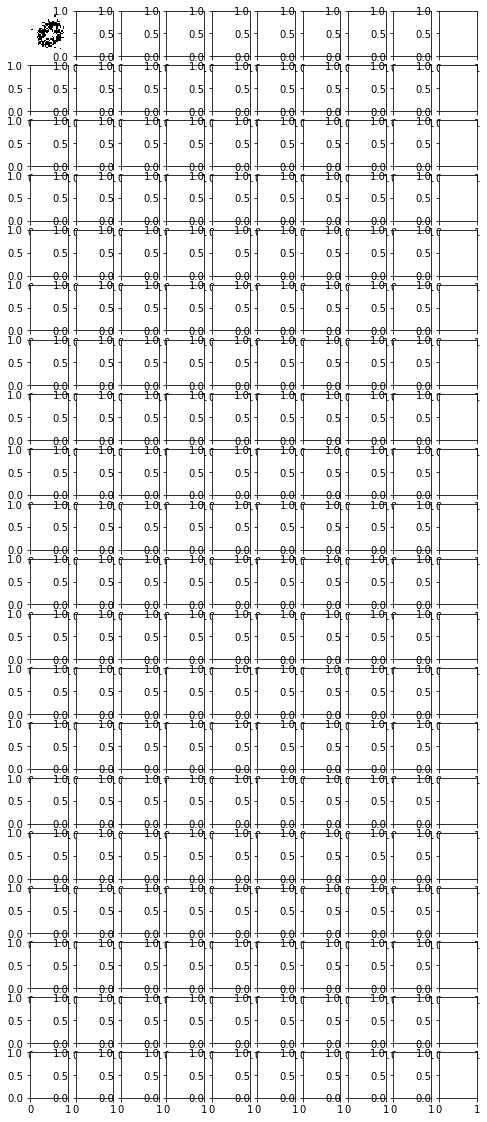

In [5]:
#def P10(num_examples):

### STUDENT START ###
bnb = BernoulliNB()
y_pred = bnb.fit(mini_train_data, mini_train_labels).predict(dev_data)
print("Number of mislabeled points out of a total %d points : %d" % (dev_data.shape[0],(dev_labels != y_pred).sum()))

tempLabels = mini_train_labels
tempData = mini_train_data

for i in range(10):
    for j in range(20):
        index = tempLabels.tolist().index(float(i))
        #generate fake tempData
        prob = np.exp(bnb.feature_log_prob_[i])
        numarray = []
        #f = plt.figure(1)
        for x in range(784):
            rand = np.random.rand(1,1)[0][0]
            if rand < prob[x]:
                numarray.append(1)
            else:
                numarray.append(0)
        img = np.reshape(numarray,(28,28))
        fig, ax = plt.subplots(20,10, figsize = (8,20))
        plt.subplot(20,10,i*10+j+1)
        plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.axis('off')
        tempLabels = tempLabels.tolist()
        del tempLabels[index]
        tempLabels = np.asarray(tempLabels)
        tempData = tempData.tolist()
        del tempData[index]
        tempData = np.asarray(tempData)

### STUDENT END ###

#P10(20)

ANSWER: Since the image pixel values are being evaluated against a random number generator, each image definitely has more "static." I also notice a lot of holes in the numbers due to this. While they definitely look different from the original or blurred images, I can still make out what most of the numbers read. For the most part, each number of every class looks very similar. 

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [85]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

bnb = BernoulliNB()
y_pred = bnb.fit(train_data, train_labels).predict(test_data)
print("Number of mislabeled points out of a total %d points : %d" % (test_data.shape[0],(test_labels != y_pred).sum()))

# prepare a range of alpha values to test
alphas = np.array([0.001])

cv = GridSearchCV(bnb, param_grid=dict(alpha=alphas))

cv.fit(train_data, train_labels)
y_predictions = cv.predict(test_data)
report = classification_report( test_labels, y_predictions)

post = cv.predict_proba(test_data)

for x in range(len(post)):
    num = max(post[x])
    #index = np.where(post[x] == num)
    for y in range(len(buckets)):
        if num <= buckets[y]:
            total[y] = total[y]+1
            break
        else:
            continue
    if test_labels[x] == y_predictions[x]:
        correct[y] = correct[y]+1

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): 
        accuracy = float(correct[i]) / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)
                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

Number of mislabeled points out of a total 9000 points : 1488
p(pred) <= 0.5000000000000    total =   3    accuracy = 0.000
p(pred) <= 0.9000000000000    total = 271    accuracy = 0.446
p(pred) <= 0.9990000000000    total = 564    accuracy = 0.473
p(pred) <= 0.9999900000000    total = 555    accuracy = 0.514
p(pred) <= 0.9999999000000    total = 517    accuracy = 0.642
p(pred) <= 0.9999999990000    total = 490    accuracy = 0.706
p(pred) <= 0.9999999999900    total = 501    accuracy = 0.752
p(pred) <= 0.9999999999999    total = 472    accuracy = 0.820
p(pred) <= 1.0000000000000    total = 5627    accuracy = 0.960


ANSWER: The accuracy for each bucket is pretty consistently below 80% until the last two buckets. Though this is true, the numbers seem to increase pretty consistently and reasonably considering the totals, so I would say that the classifiers are weakly calibrated. This means that the accuracy is relative, but not literal.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()